# k-NN CHALLENGE

**File:** kNNChallenge.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# CHALLENGE

In this challenge, I invite you to do the following:

1. Import and prepare the Breast Cancer training and testing datasets.
1. Prepare the data.
1. Train and optimize the kNN model.
1. Plot the accuracy of the parameters.
1. Apply the kNN model to the training data.
1. Graph the confusion matrix.
1. Calculate the overall accuracy of the model on the testing data.

# IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
from sklearn.model_selection import GridSearchCV     # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
from sklearn.metrics import plot_confusion_matrix    # Evaluation measure

# LOAD AND PREPARE DATA

Many of the datasets for this course come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For this challenge, we'll use the "Breast Cancer Wisconsin (Original) Data Set," which can be found at [https://j.mp/2NsaIlc](https://j.mp/2NsaIlc). To save time, I have already prepared the dataset by doing the following:

- Removed the variable `Id`.
- Renamed the attribute variables to `X0` through `X8`.
- Renamed the variable `class` to `y`.
- Converted all attribute variables from categorical to numeric.
- Dropped cases with missing values.
- Split the data into training (70%) and testing (30%) datasets.

This makes it possible to directly load the prepared training and testing datasets below.

## Import Data

In [4]:
# Imports the training data
trn = pd.read_csv('data/BreastCancer_trn.csv')

# Separate the attributes X0-X8 into X_trn
X_trn = trn.filter(regex='\d')

# Separate the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/BreastCancer_tst.csv')

# Separate the attributes X0-X8 into X_tst
X_tst = tst.filter(regex='\d')

# Separate the class variable into y_tst
y_tst = tst.y

# Class labels
diagnosis = ['Benign', 'Malignant']

Look at the first few rows of the training data.

In [5]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,y
0,3,1,1,1,3,2,1,1,1,benign
1,5,1,3,1,2,1,2,1,1,benign
2,7,5,6,10,4,10,5,3,1,malignant
3,1,1,1,3,1,3,1,1,1,benign
4,2,1,1,1,3,1,2,1,1,benign


In [6]:
# Set up a kNN model and fit it to the data
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)

In [7]:
# Calculate mean accuracy on training data
print(
    'Accuracy on training data: '
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 97.91%


In [8]:
# Optimize the model
# Set up the kNN classifier object
knn = KNeighborsClassifier()

# Search parameters
param = range(3, 15, 2)

# Set up GridSearchCV object and store it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fit the grid object and get the best model
best_knn = grid \
    .fit(X_trn, y_trn) \
    .best_estimator_

# Display the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

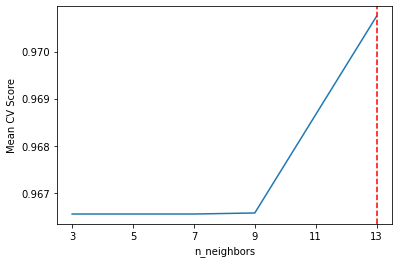

In [9]:
# Plot mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Add labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draw a verticle line where the best model is
plt.axvline(
    x=best_knn.n_neighbors,
    color='red',
    ls='--')

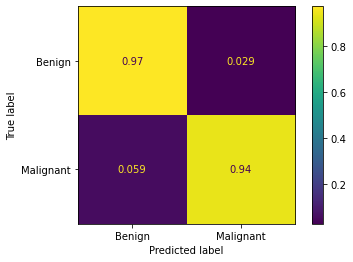

In [10]:
# Test the model
# Visualize the confusion matrix
plot_confusion_matrix(
    best_knn, X_tst, y_tst,
    display_labels=diagnosis,
    normalize='true')

In [11]:
# Calculate mean accuracy on testing data
print(
    'Accuracy on testing data: '
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 96.10%


# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.